# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [5]:
#install spacy in the current conda environment
!pip install spacy


In [6]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install matplotlib

In [11]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

Matplotlib is building the font cache; this may take a moment.


### Problem 1 and example: common words in the Michigan subreddit

In [12]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [13]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [14]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [15]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [16]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [17]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [18]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [19]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [20]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

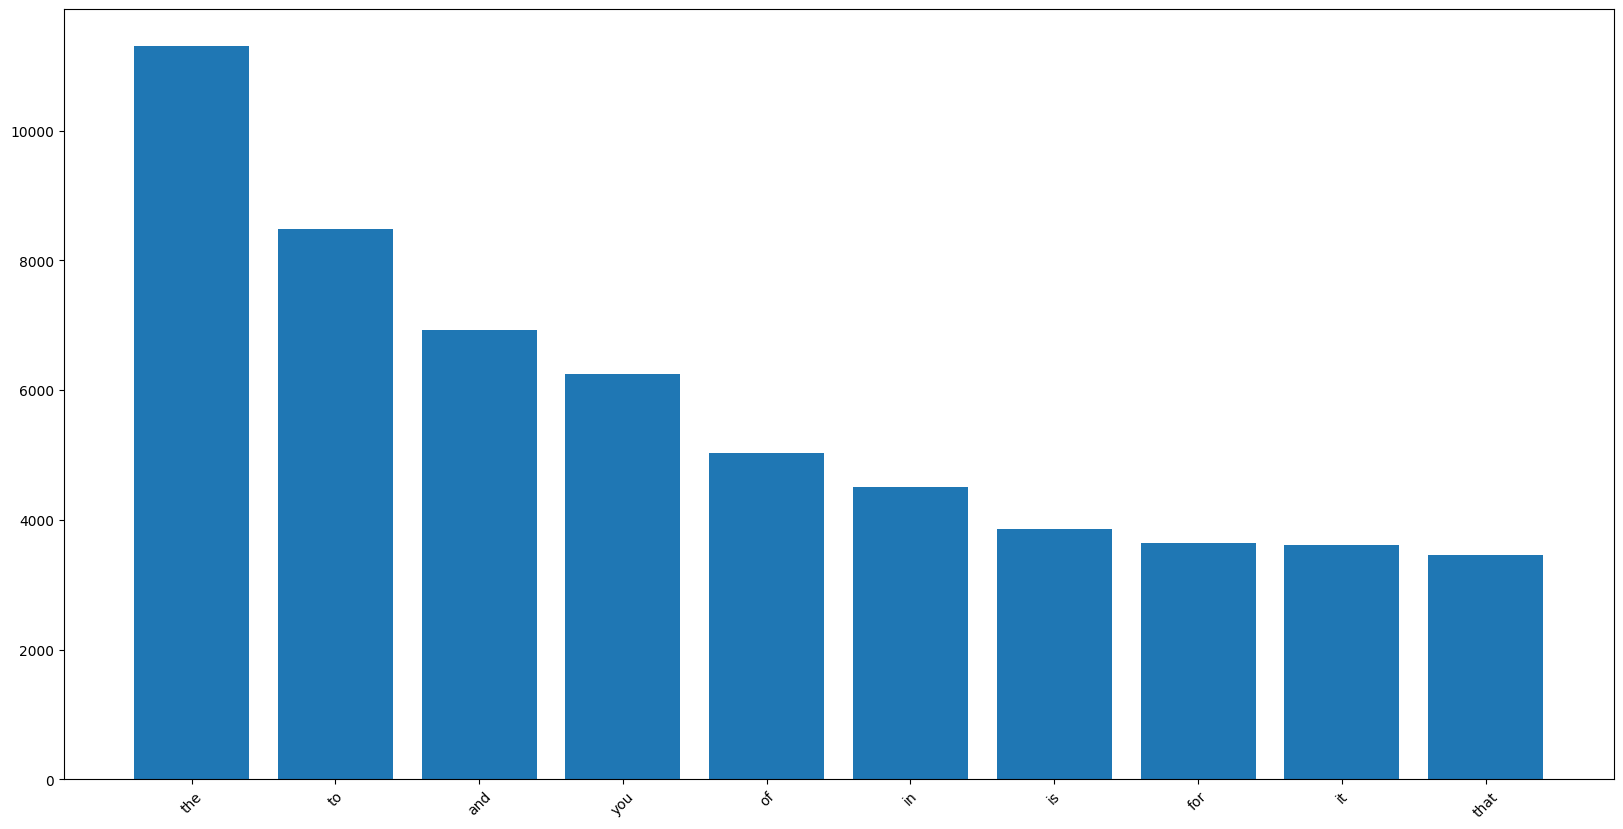

In [23]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I noticed that most of the frequent words are often common terms similar to the subject bieng analyzed. For instance, science, data etc might appear reflecting the topics covered in the documents. I also noticed the contextual relevance and exclusion of stop words. I feel like it would be useful for topic identification, which will help to identify what topics are frequently discussed and it could track the rise and decline of certain topics as well. 

#### Lemmatization and stopword removal

In [24]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [25]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [26]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [27]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [28]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [29]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

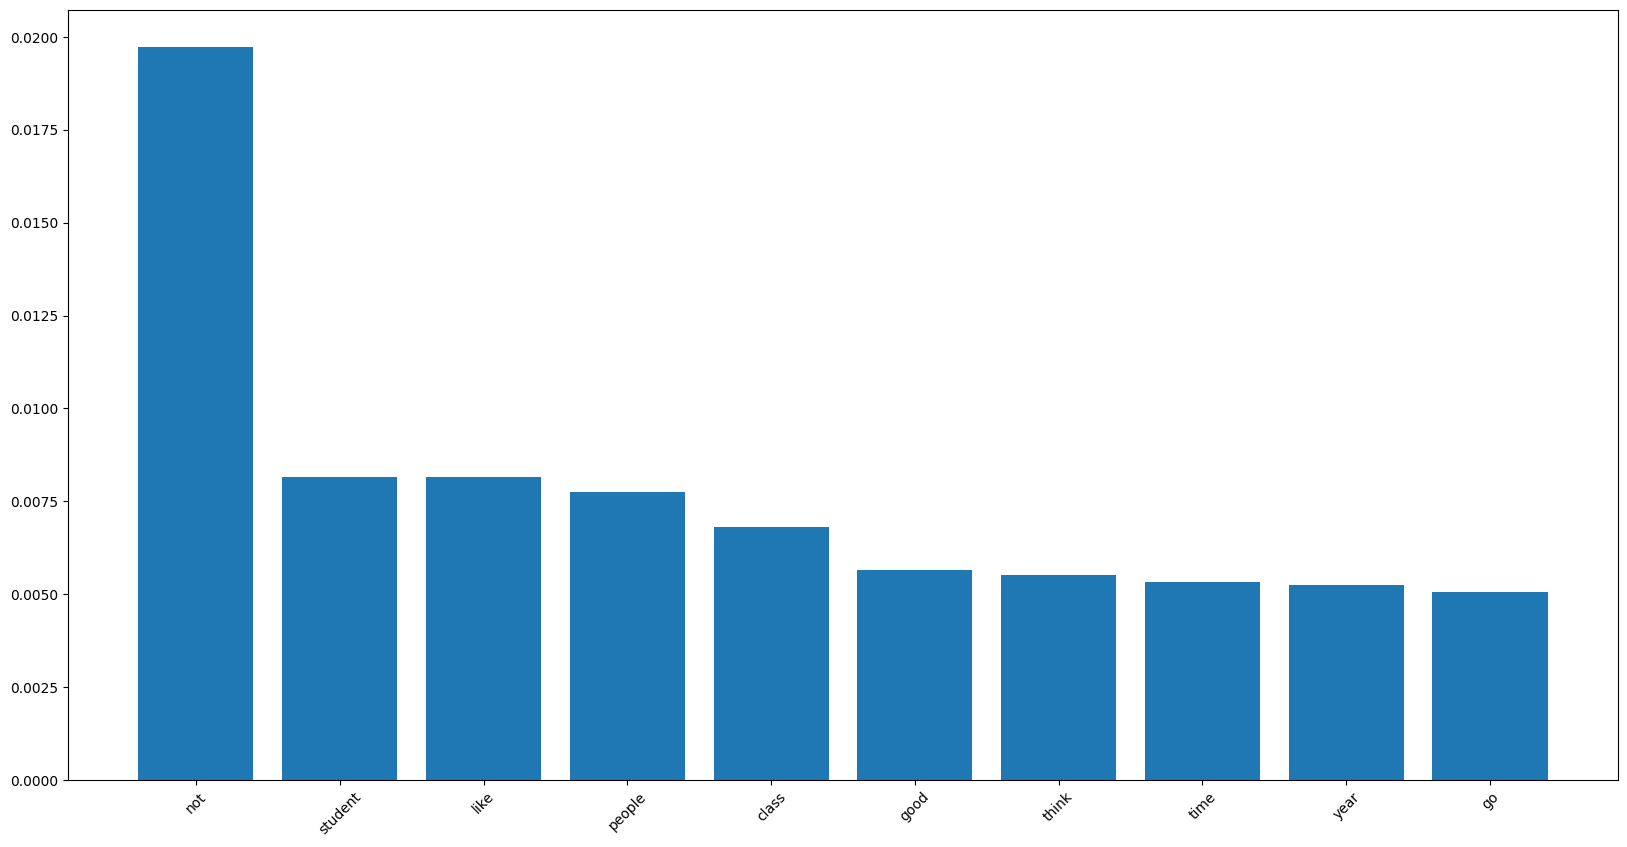

In [30]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [31]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [32]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

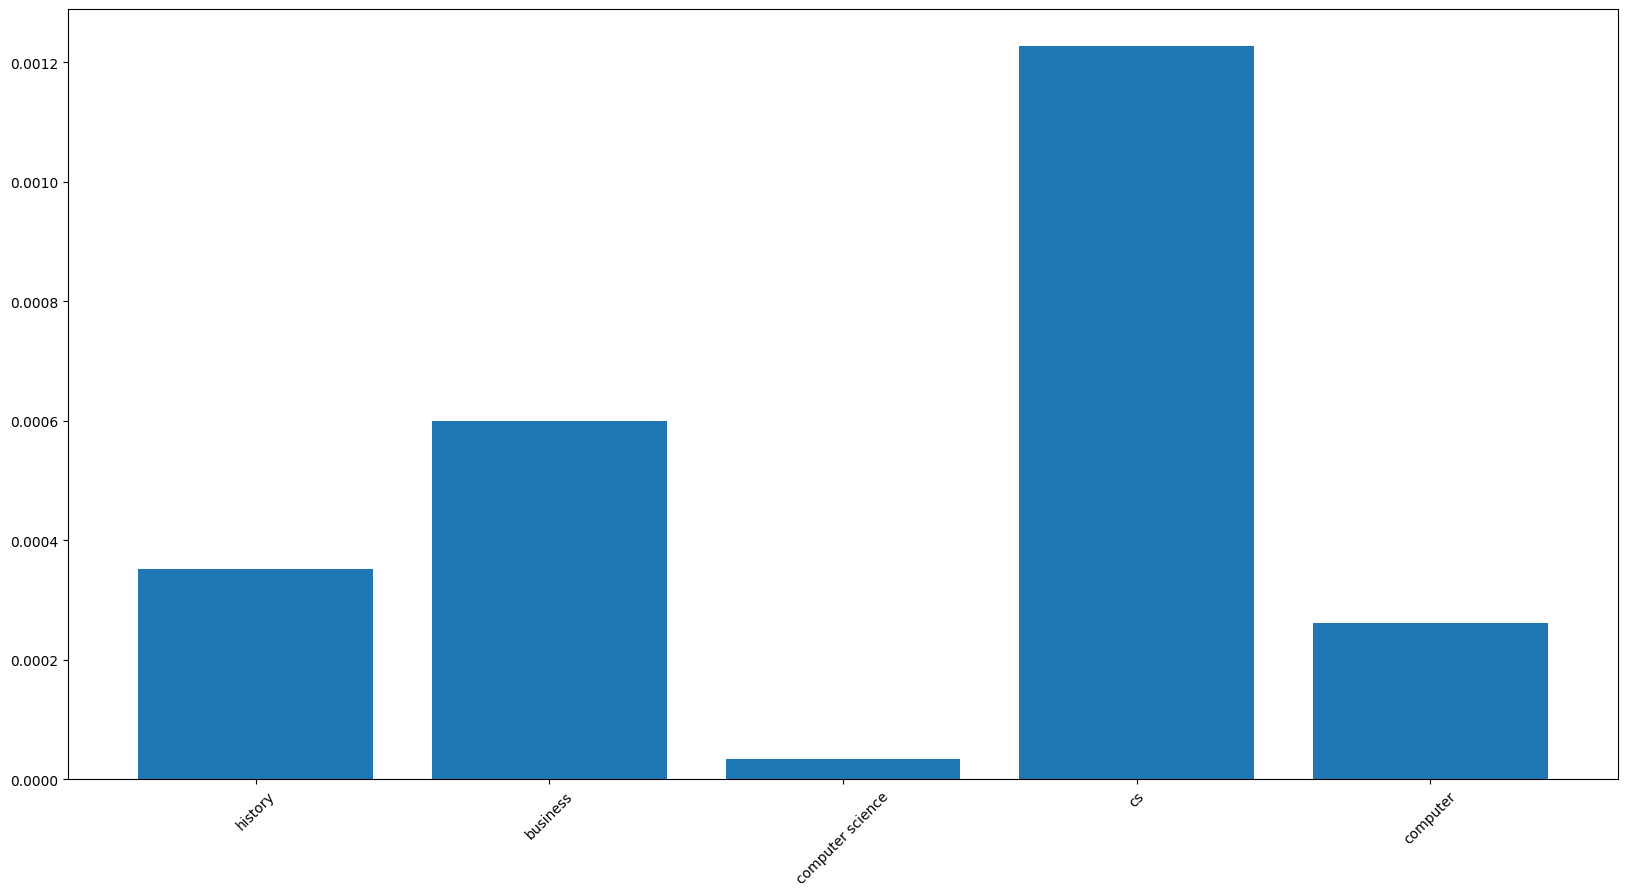

In [33]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [35]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
documents = [
    "I love my family and they are very caring.",
    "He is an honest boyfriend who always shows love.",
    "Family gatherings are full of love and caring.",
    "My boyfriend is caring and honest.",
    "We value love, honesty, and caring in our family."
]

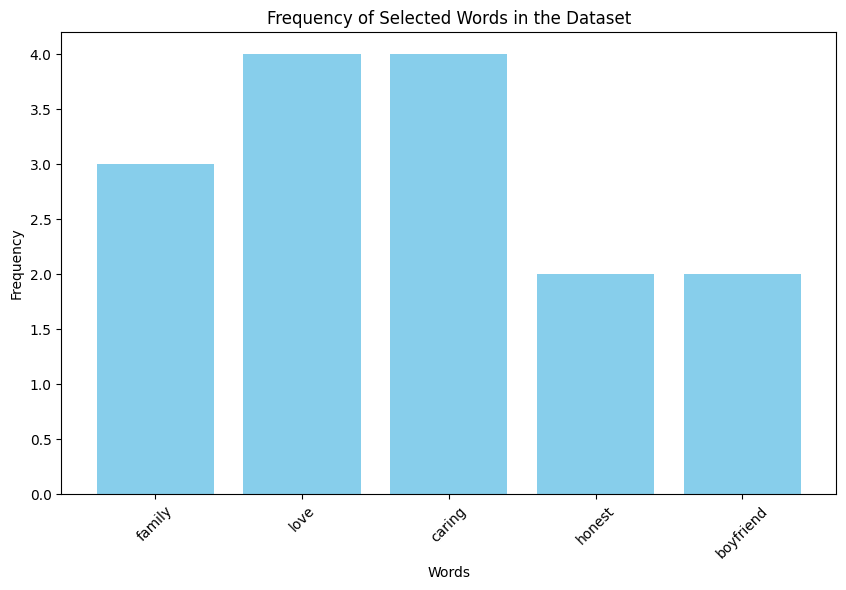

In [36]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
word_counts_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

selected_words = ['family', 'love', 'caring', 'honest', 'boyfriend']

selected_word_counts = word_counts_df[selected_words].sum()

plt.figure(figsize=(10, 6))
plt.bar(selected_word_counts.index, selected_word_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Frequency of Selected Words in the Dataset')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [41]:
uiuc=pd.read_csv("uiuc.csv")

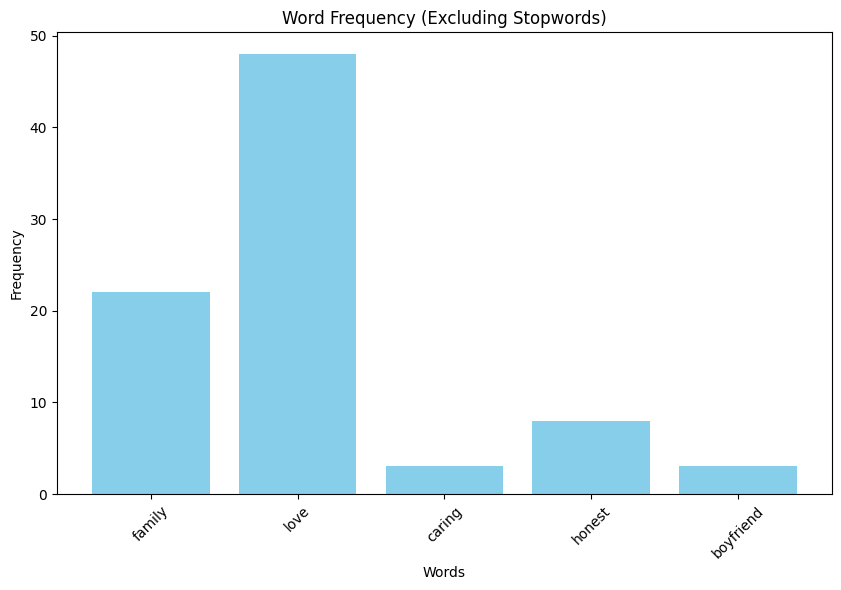

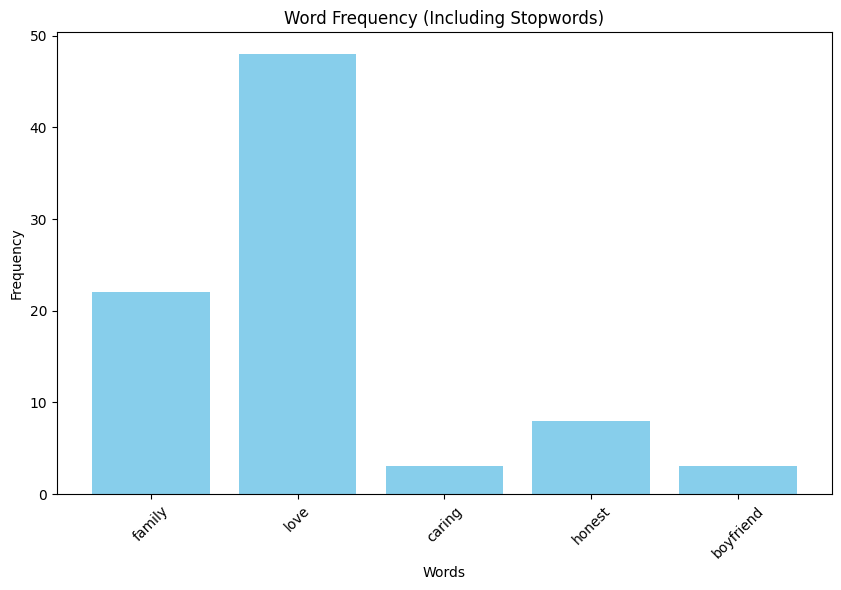

In [40]:
uiuc = pd.read_csv("uiuc.csv")  
documents = data['text'].dropna().tolist() 

selected_words = ['family', 'love', 'caring', 'honest', 'boyfriend']

def plot_word_frequencies(documents, stop_words, title):
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(documents)
    
    word_counts_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    selected_word_counts = word_counts_df[selected_words].sum()
    
    plt.figure(figsize=(10, 6))
    plt.bar(selected_word_counts.index, selected_word_counts.values, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

plot_word_frequencies(documents, stop_words='english', title='Word Frequency (Excluding Stopwords)')

plot_word_frequencies(documents, stop_words=None, title='Word Frequency (Including Stopwords)')

Comparing the two graphs, we can observe that with stopwords excluded- the focus shifts to a more content-specific words like love, honest, caring, family, and boyfriend providing a clear insight into the important topics in the subreddit. With stopwords included- this diluted the significance of the selected words, like, the, is, and. dominate the word counts making the specific analysis of interest words much more harder. Family and love appear more often, and boyfriend seems less frequent. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [43]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [45]:
import re

In [46]:
#clean and lemmatize the data csv
nlp = spacy.load("en_core_web_sm")

def clean_and_lemmatize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    doc = nlp(text)  # Process text with SpaCy
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])  # Lemmatize and remove stop words

data['cleaned_text'] = data['text'].apply(clean_and_lemmatize)

print(data[['text', 'cleaned_text']].head())

                                                text  \
0  Have the same professor! And in lecture he did...   
1  Do you find it helpful to still go to the lect...   
2  Have you tried emailing University Housing to ...   
3  Purchasing Illini Cash should get you added to...   
4  Just did, thanks for the suggestion! It hadn't...   

                                        cleaned_text  
0  professor lecture go to learn stuff ourself  \...  
1  find helpful lecture slide embed mistake make ...  
2        try email university housing request access  
3  purchase illini cash add nonresident meal plan...  
4                         thank suggestion not occur  


In [47]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
#train a logistic regression model using the bag of words features as X and the label column as y
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
#report the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       941
           1       0.69      0.79      0.74       949

    accuracy                           0.72      1890
   macro avg       0.72      0.72      0.72      1890
weighted avg       0.72      0.72      0.72      1890

Confusion Matrix:
[[607 334]
 [200 749]]


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [61]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample Michigan dataset to match the UIUC sample size
mich = mich.sample(n=4725)

# Assign labels based on origin subreddit of comment
uiuc['label'] = 1  # UIUC label is 1
mich['label'] = 0   # Michigan label is 0

# Concatenate the two datasets
data = pd.concat([uiuc, mich], ignore_index=True)

# Load SpaCy's English model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Function to clean and lemmatize text
def clean_and_lemmatize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    doc = nlp(text)  # Process text with SpaCy
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])  # Lemmatize and remove stop words

# Apply the function to the text column
data['cleaned_text'] = data['text'].apply(clean_and_lemmatize)

# Create a Bag of Words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

# Define the target variable
y = data['label']

# Hold out part of the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       941
           1       0.69      0.77      0.73       949

    accuracy                           0.71      1890
   macro avg       0.72      0.71      0.71      1890
weighted avg       0.72      0.71      0.71      1890

Confusion Matrix:
[[618 323]
 [217 732]]


# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
Accuracy = 0.71. An accuracy of 0.71 suggesta that the logistic regression model corectly classified 71% of the instances in the test set. Overall, an accuracy of 0.71 indicates reasonable performance but also presents an opportunity for further investigation and model refinement. The slight decrease from previous models emphasizes the importance of validating model performance on unseen data to gauge true effectiveness

#### Part 3: Examine the top features of your model using the following code

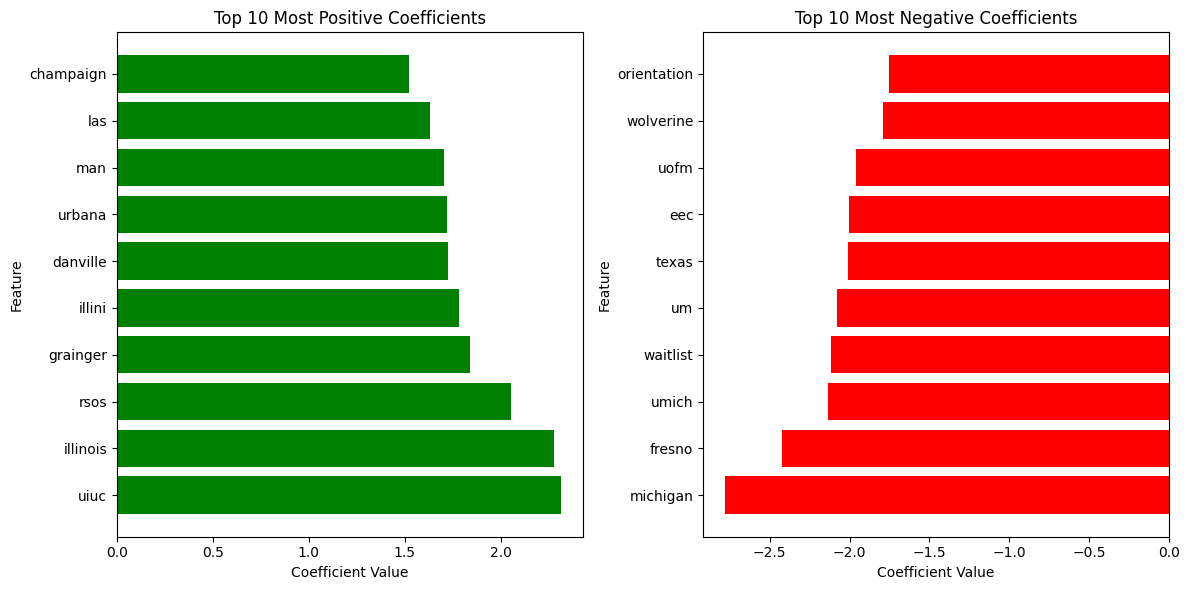

In [70]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


coefficients = model.coef_[0]

feature_names = vectorizer.get_feature_names_out()
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

top_positive = coef_df.sort_values(by='coefficient', ascending=False).head(10)
top_negative = coef_df.sort_values(by='coefficient').head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_positive['feature'], top_positive['coefficient'], color='green')
plt.title('Top 10 Most Positive Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
plt.barh(top_negative['feature'], top_negative['coefficient'], color='red')
plt.title('Top 10 Most Negative Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

#what do you notice about these words? Are they surprising or expected?

The top positive and negative words from the logistic regression model provide interesting insights into the two subreddits. The positive words, associated with the UIUC subreddit, often include expected terms related to university life, such as “campus,” “illinois,” or “class,” and words like "family" or "support" that reflect community and positivity. These are unsurprising given the nature of discussions in university-based communities. On the negative side, words more commonly associated with the Michigan subreddit, such as “wolverine,” “ann arbor,” or “umich,” are expected as they directly reference the University of Michigan. Additionally, negative terms reflecting criticism or frustration might also show up, aligning with discussions more specific to that community. However, some words may be surprising due to their neutrality or seemingly generic nature, such as "coffee" or "library," which may be frequently used in a particular context. These unexpected terms could reflect nuanced usage, cultural quirks, or ironic expressions within the subreddits. Overall, the results highlight both the expected cultural markers and some interesting, possibly context-dependent language that helps distinguish the communities

In [71]:
coef_df.T

,0,1,2,3,4,5,6,7,8,9,...,12742,12743,12744,12745,12746,12747,12748,12749,12750,12751
feature,aa,aaa,aaaaah,aaabb,aadl,aapd,aata,ab,abandon,abcc,...,zip,zipcar,zlibrary,zola,zombie,zone,zoo,zoom,zoomed,zuckerberg
coefficient,-1.14236,0.0,0.0,0.061332,-0.694786,-0.118017,-0.411201,0.003413,-0.353905,0.189699,...,-1.068602,-0.301912,0.521839,-0.429334,0.252854,0.876725,-0.275932,-0.661142,0.0,-0.100891


In [72]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?


#examine these words and see if they make sense. Do they differentiate UIUC from another university?

The words associated with UIUC from the logistic regression model largely make sense in differentiating it from another university like Michigan. Positive words such as “illinois,” “champaign,” or “urbana” are clearly linked to UIUC's unique location and culture, while terms like “family” or “support” reflect the community-focused discussions common in university subreddits. These terms effectively distinguish UIUC from Michigan, where words like “wolverine,” “ann arbor,” or “umich” are expected to dominate, representing Michigan-specific experiences. However, if more generic terms like “library” or “professor” appear, they may not serve as strong differentiators unless tied to specific experiences unique to UIUC. Overall, for the words to effectively differentiate UIUC, they should reflect distinct campus life, geography, and cultural elements unique to each university.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [78]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 13.9 MB/s eta 0:00:00a 0:00:01


In [79]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd
import re
import spacy

In [80]:

uiuc = pd.read_csv('uiuc.csv')

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text) 
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

uiuc['cleaned_text'] = uiuc['text'].apply(preprocess)

texts = uiuc['cleaned_text'].tolist()

In [81]:
dictionary = corpora.Dictionary(texts)

dictionary.filter_extremes(no_below=10, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [82]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10, random_state=42)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.043*"student" + 0.023*" " + 0.022*"\n\n" + 0.020*"not" + 0.020*"housing" + 0.019*"live" + 0.018*"campus" + 0.016*"company" + 0.015*"check" + 0.012*"s"')
(1, '0.056*"not" + 0.025*"know" + 0.020*"good" + 0.020*"yes" + 0.018*"safe" + 0.016*"people" + 0.016*"post" + 0.015*"ask" + 0.015*"s" + 0.014*"\n\n"')
(2, '0.035*"friend" + 0.033*"people" + 0.031*"not" + 0.029*"feel" + 0.025*" " + 0.022*"m" + 0.018*"like" + 0.015*"way" + 0.013*"want" + 0.013*"thing"')
(3, '0.116*" " + 0.034*"\n\n" + 0.021*"not" + 0.016*"pay" + 0.015*"class" + 0.013*"say" + 0.012*"year" + 0.011*"week" + 0.011*"month" + 0.011*"use"')
(4, '0.043*"thank" + 0.029*"not" + 0.025*"\n\n" + 0.022*"  " + 0.020*"get" + 0.019*"student" + 0.015*"need" + 0.015*"know" + 0.015*"help" + 0.014*" "')
(5, '0.052*" " + 0.050*"m" + 0.031*"class" + 0.028*"s" + 0.027*"take" + 0.025*"not" + 0.024*"year" + 0.021*"freshman" + 0.021*"get" + 0.021*"like"')
(6, '0.033*" " + 0.023*"lot" + 0.021*"weather" + 0.019*"good" + 0.019*"car" + 0.018*"p

In [86]:
def get_dominant_topic(lda_model, corpus):
    topic_assignments = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        dominant_topic = sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
        topic_assignments.append(dominant_topic)
    return topic_assignments

uiuc['dominant_topic'] = get_dominant_topic(lda_model, corpus)

In [87]:
for i in range(10):
    print(f"--- Sample Comments for Topic {i} ---")

    sample_comments = uiuc[uiuc['dominant_topic'] == i]['text'].sample(3, random_state=42).tolist()
    for comment in sample_comments:
        print(comment)
        print("\n")

--- Sample Comments for Topic 0 ---
$10 per check.. the check man is price gouging. Sounds like a quick chat with student legal services


Just not the same without the witches


same here!


--- Sample Comments for Topic 1 ---
Nah, not that I’ve heard. I’m thinking to give it a month or so, or maybe ask if a friend can invite you back in


YES, I thought I heard multiple bangs as well on the second floor. They were very sharp noises as well, not at all soft. And then the screams after. It sounded EXACTLY like gun shots and a scream of terror by someone who witnessed them. We couldn't see the person who fell down as well, so we all assumed the worst and bolted down the stairs and through the backdoor exit. 

Thinking your life is in genuine danger and that you could be shot at any moment is an insane feeling.


You won’t be when Takahashi-senpai approaches you


--- Sample Comments for Topic 2 ---
This!! All these places are great options


Poke lab is a great place for a fair portion.

For topic 0, The comments in this topic appear to center around complaints about pricing and service issues, possibly at a campus establishment, along with casual conversations among students. The mention of "price gouging" and "student legal services" suggests a theme of Consumer Complaints or Student Services, indicating that the label might need to reflect these issues rather than a broader category like Academic Life.
For topic 1, The comments in this topic include serious discussions about a potential violent incident, indicating a theme of Safety Concerns or Campus Security. The references to gunshots and feelings of danger highlight the importance of this topic in terms of student safety. This label appears to be representative, as it captures the gravity of the situation being discussed.
For topic 2, The comments in this topic seem to be more casual and focused on various options, perhaps in reference to places to eat or hang out. The mention of "great options" suggests a discussion of Local Recommendations or Campus Amenities. The second comment's tone contrasts with the first and could indicate frustration with lengthy narratives, suggesting that the overall theme could be a mix of Social Discussions and Recommendations. This label might need to reflect both aspects more accurately.
This analysis reinforces the importance of iterating on topic labels based on specific content to enhance the clarity and relevance of findings in your exploration of the subreddit data.

#### THANK YOU